# Customer Churn Prediction

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from itertools import product
from sklearn.metrics import accuracy_score, confusion_matrix

In [74]:
df = pd.read_csv('Churn_Modelling.csv')

In [75]:
df.head() #getting the first 5 rows 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [76]:
df.info() #gives information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [77]:
df.describe()   #describes the dataset

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [78]:
df.shape    #no.of rows and columns

(10000, 14)

In [79]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

n = (df.dtypes != 'object')
num_cols = list(n[n].index)

print("Numerical variables:")
print(num_cols)

Categorical variables:
['Surname', 'Geography', 'Gender']
Numerical variables:
['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [80]:
print(df['Geography'].unique())
print(df['Gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [81]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [82]:
# Including only Potential Predictors as independent varibles
df1 = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]

In [83]:
df1.head()    #top 5 columns after removing few unnecessary  

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='IsActiveMember', ylabel='count'>

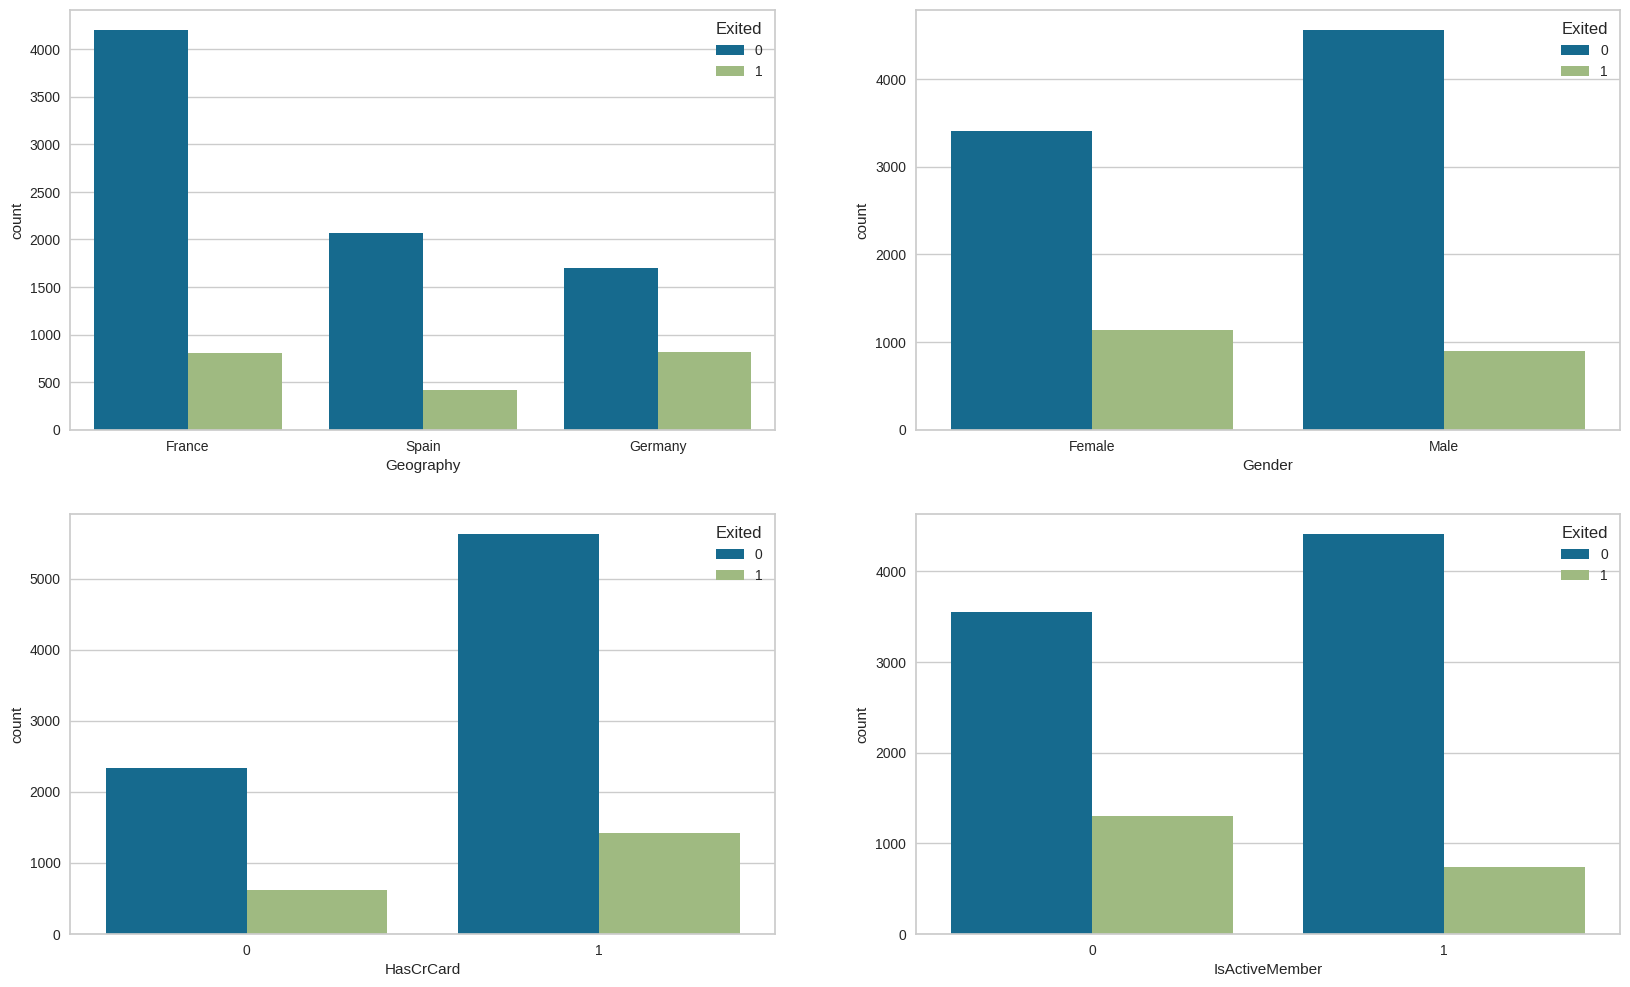

In [84]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df1, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df1, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df1, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df1, ax=axarr[1][1])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

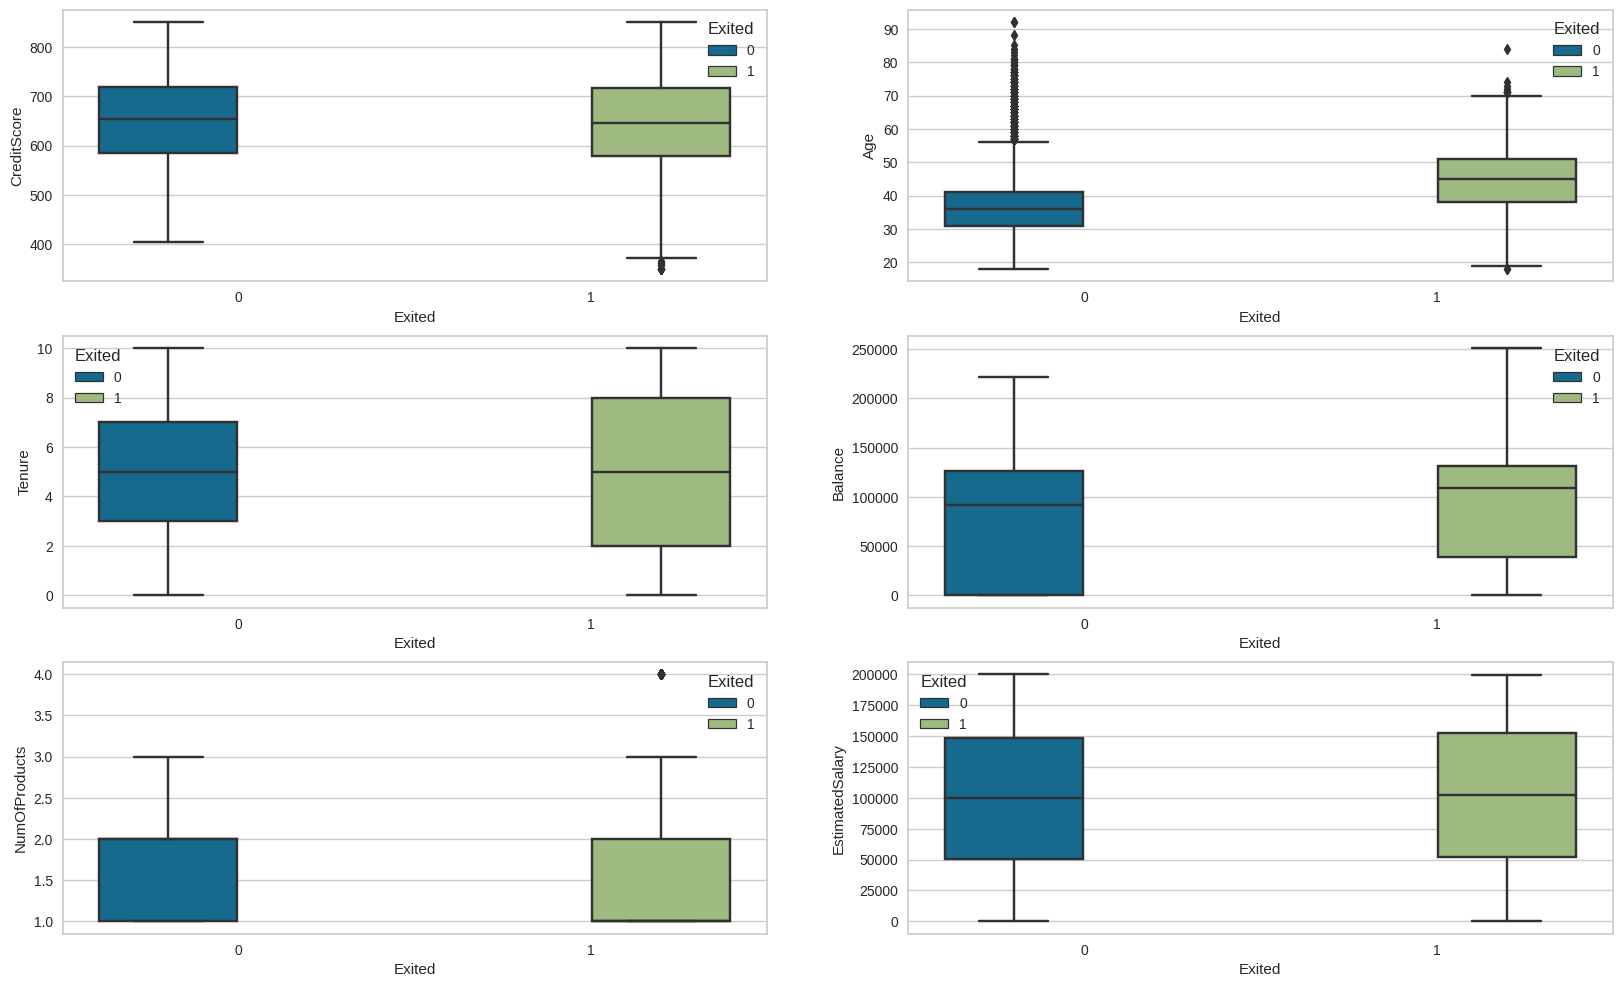

In [85]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df1, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df1 , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df1, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df1, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df1, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df1, ax=axarr[2][1])

<Axes: >

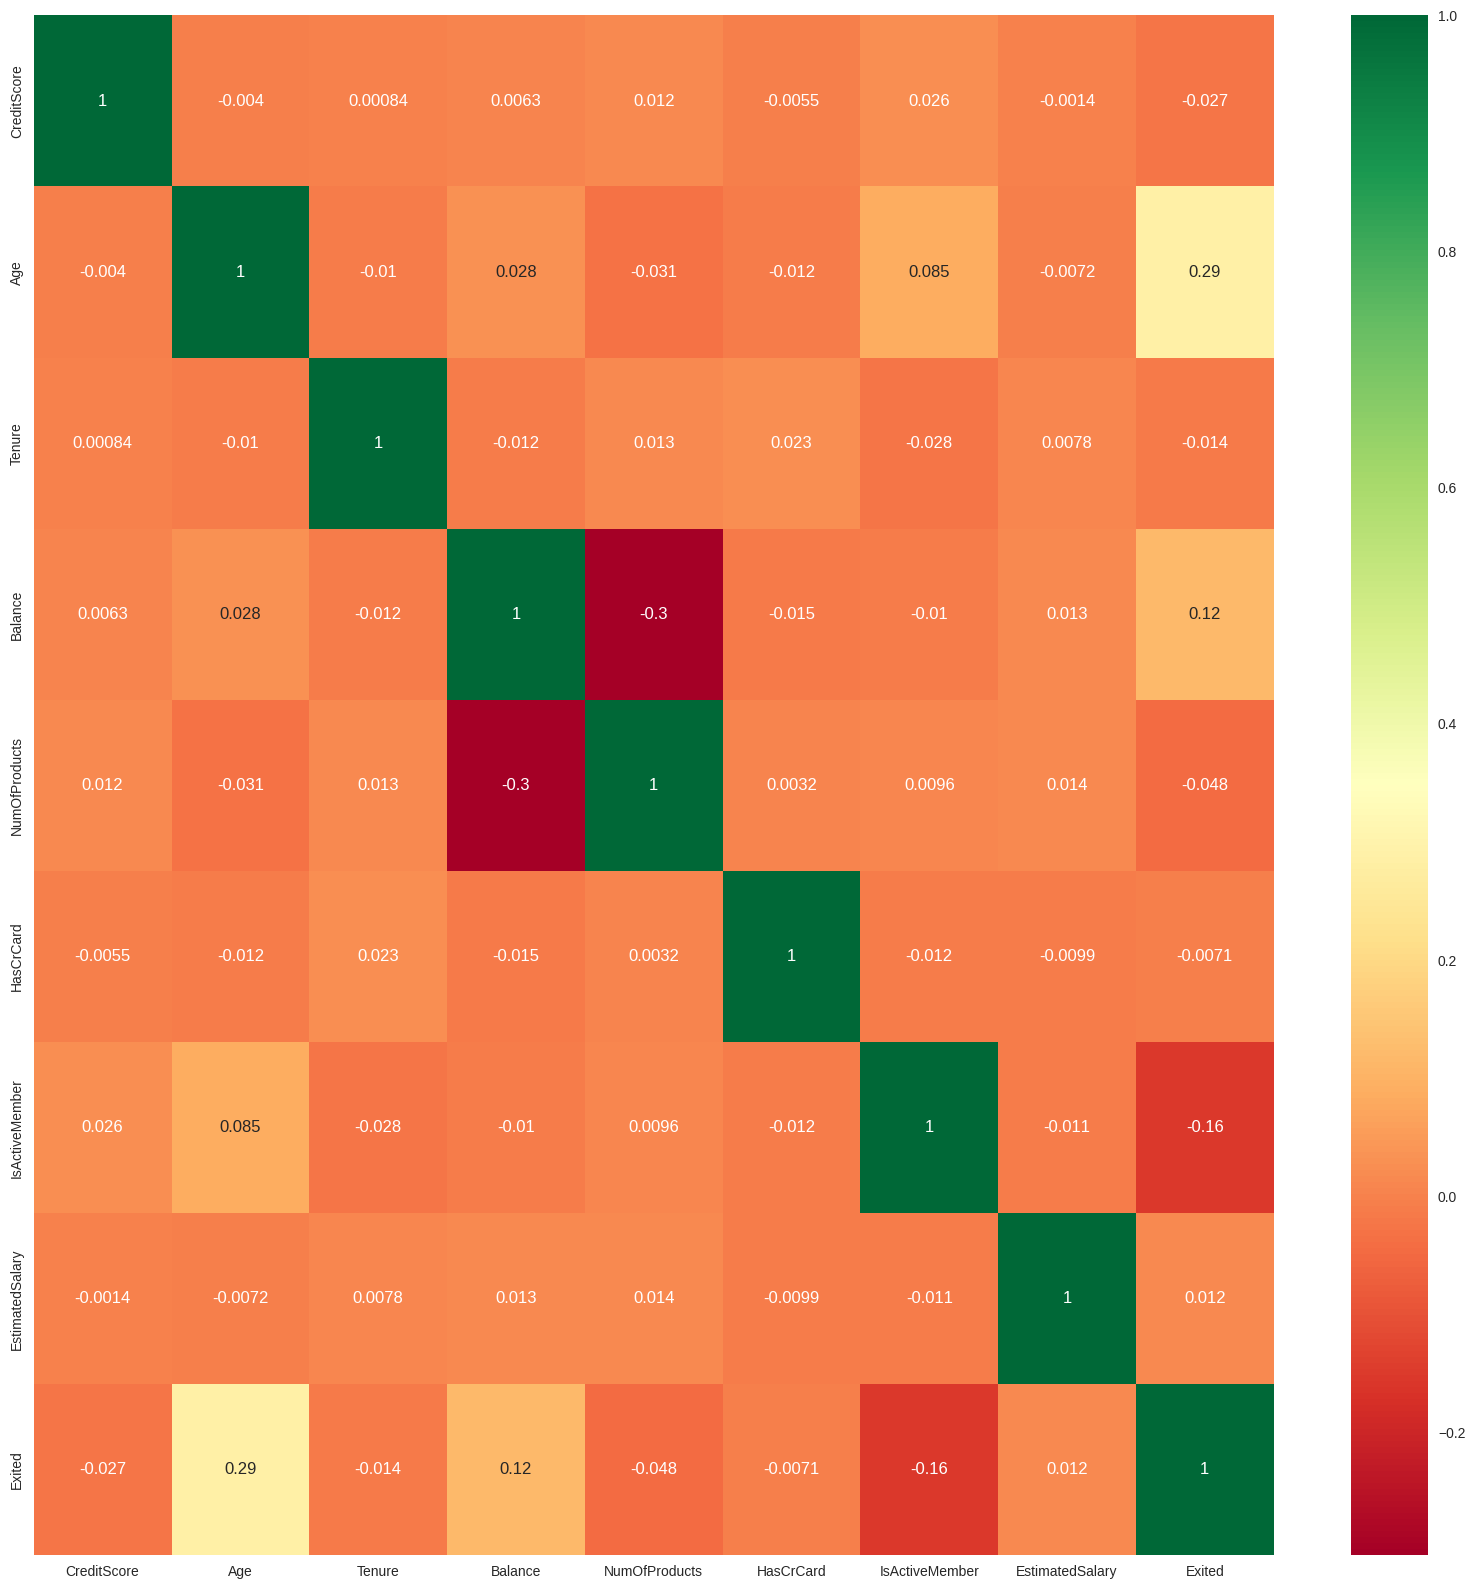

In [86]:
# Plotting The Correlations between all the features
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df1[top_corr_features].corr(), annot=True, cmap='RdYlGn')

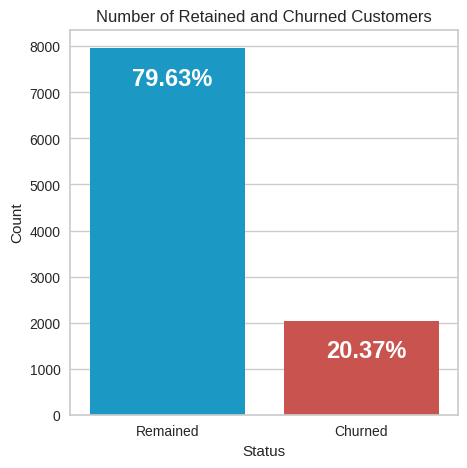

In [87]:
colors = ['#00A5E0', '#DD403A']
label_size = 17
fig = plt.figure(figsize = (5, 5))
sns.countplot(x = 'Exited', data = df1, palette = colors)

for index, value in enumerate(df1['Exited'].value_counts()):
    label =  '{}%'.format(round( (value/df1['Exited'].shape[0])*100, 2)) 
    plt.annotate(label, xy = (index - 0.18, value - 800), color = 'w', fontweight = 'bold', size = label_size)

plt.title('Number of Retained and Churned Customers')
plt.xticks([0, 1], ['Remained', 'Churned'])
plt.xlabel('Status')
plt.ylabel('Count');

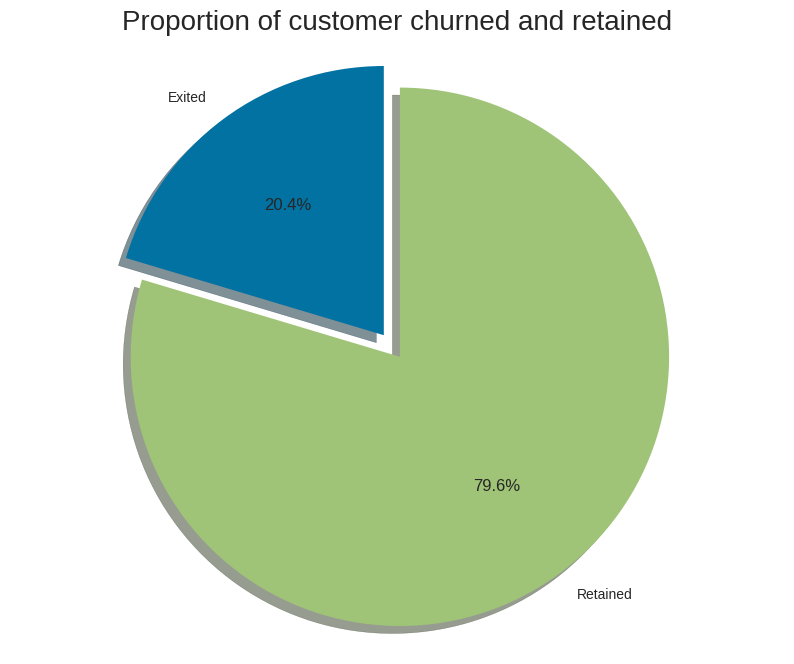

In [88]:
labels = 'Exited', 'Retained'
sizes = [df1.Exited[df1['Exited']==1].count(), df1.Exited[df1['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [89]:
le=LabelEncoder()
for i,v in enumerate([ 'Geography', 'Gender']):

    df1.loc[:,v]=le.fit_transform(df1.loc[:,v])
    df_LE = df1.copy()

In [90]:
df_LE.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [91]:
# Splitting the Dataset into Dependent and Independent Variables
X = df_LE.iloc[:, [0,1,2,3,4,5,6,7,8,9]]
y = df_LE.iloc[:, 10].values

In [92]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [93]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [94]:
X.shape,y.shape

((10000, 10), (10000,))

In [95]:
from imblearn.over_sampling import SMOTE

In [96]:
smpl = SMOTE()
X_res,y_res=smpl.fit_resample(X,y)

In [97]:
X_res.shape,y_res.shape

((15926, 10), (15926,))

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2, random_state = 42)

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 1. Logistic Regression 

In [100]:
lr = LogisticRegression(random_state=0)

In [101]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([0, 1, 0, ..., 1, 1, 0])

### Confusion Matrix

In [103]:
cm = confusion_matrix(y_test,y_pred_lr)
print(cm)


[[1250  383]
 [ 339 1214]]


### Accuracy Score:

In [104]:
print(accuracy_score(y_test,y_pred_lr)*100)

77.338355304457


## 2. Decision Trees Classifier:

In [105]:
dt = DecisionTreeClassifier()

In [106]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [107]:
y_pred_dt = dt.predict(X_test)

### Confusion Matrix

In [108]:
cm = confusion_matrix(y_test,y_pred_dt)
print(cm)

[[1300  333]
 [ 307 1246]]


### Accuracy Score:

In [109]:
print(accuracy_score(y_test,y_pred_dt)*100)

79.91211550533585


## 3. Random Forest Classifier:

In [110]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [111]:
y_pred_rf = rf.predict(X_test)

### Confusion Matrix

In [112]:
cm = confusion_matrix(y_test,y_pred_rf)
print(cm)

[[1412  221]
 [ 223 1330]]


### Accuracy Score:

In [113]:
print(accuracy_score(y_test,y_pred_rf)*100)

86.06403013182674


## 4. AdaBoost

In [114]:
ab = AdaBoostClassifier()

In [115]:
ab.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=None)

In [116]:
y_pred_ab = ab.predict(X_test)

### Confusion Matrix

In [117]:
cm = confusion_matrix(y_test,y_pred_ab)
print(cm)

[[1348  285]
 [ 257 1296]]


### Accuracy Score:

In [118]:
print(accuracy_score(y_test,y_pred_ab)*100)

82.98807281858129


## 5. Gradient Boosting

In [119]:
gb = GradientBoostingClassifier()

In [120]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [121]:
y_pred_gb = gb.predict(X_test)

### Confusion Matrix

In [122]:
cm = confusion_matrix(y_test,y_pred_gb)
print(cm)

[[1394  239]
 [ 266 1287]]


### Accuracy Score:

In [123]:
print(accuracy_score(y_test,y_pred_gb)*100)

84.14940364092907


In [124]:
scoring = 'accuracy'

In [125]:
models = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(("AD",AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
    print(msg)

LR: 77.770801 (0.013016)
CART: 79.450549 (0.009424)
RF: 85.847724 (0.009281)
AD: 82.825746 (0.010778)
GB: 84.058085 (0.007985)


In [126]:
pip install pycaret


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [127]:
from pycaret import classification
# setup the environment 
classification_setup = classification.setup(data= df1, target='Exited')

,Description,Value
0,Session id,3051
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(10000, 11)"
4,Transformed data shape,"(10000, 11)"
5,Transformed train set shape,"(7000, 11)"
6,Transformed test set shape,"(3000, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [128]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8631,0.8567,0.5056,0.7424,0.6007,0.5218,0.5362,0.5210
gbc,Gradient Boosting Classifier,0.8629,0.8646,0.4586,0.7785,0.5757,0.5007,0.5263,1.9250
rf,Random Forest Classifier,0.8617,0.8531,0.4649,0.7649,0.5774,0.5007,0.5233,2.0610
ada,Ada Boost Classifier,0.8569,0.8489,0.4719,0.7307,0.5723,0.4913,0.5088,1.1410
xgboost,Extreme Gradient Boosting,0.8561,0.8381,0.4951,0.7135,0.5838,0.5003,0.5129,0.8110
et,Extra Trees Classifier,0.8551,0.8425,0.4488,0.7389,0.5572,0.4769,0.4987,1.1900
qda,Quadratic Discriminant Analysis,0.8341,0.8111,0.3015,0.7225,0.4247,0.3467,0.3923,0.1300
lda,Linear Discriminant Analysis,0.8084,0.7582,0.2012,0.5883,0.2989,0.2180,0.2607,0.0960
ridge,Ridge Classifier,0.8036,0.0000,0.0975,0.6132,0.1678,0.1187,0.1855,0.1500
dummy,Dummy Classifier,0.7963,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0780


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3051, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [129]:
classification_gb = classification.create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8643,0.8626,0.5070,0.7423,0.6025,0.5242,0.5380
1,0.8686,0.8866,0.4718,0.7976,0.5929,0.5206,0.5462
2,0.8514,0.8350,0.4296,0.7262,0.5398,0.4581,0.4806
3,0.8600,0.8432,0.4577,0.7558,0.5702,0.4925,0.5146
4,0.8771,0.8860,0.4545,0.8904,0.6019,0.5381,0.5807
5,0.8600,0.8799,0.4685,0.7528,0.5776,0.4991,0.5192
6,0.8671,0.8822,0.5105,0.7604,0.6109,0.5345,0.5499
7,0.8743,0.8696,0.4895,0.8235,0.6140,0.5447,0.5710
8,0.8629,0.8313,0.4476,0.7901,0.5714,0.4971,0.5256


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [130]:
predictions = classification.predict_model(classification_gb, data=df1)
# view the predictions
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8706,0.8813,0.4821,0.8043,0.6028,0.5313,0.5561


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,prediction_label,prediction_score
0,619,0,0,42,2,0.000000,1,1,1,101348.882812,1,0,0.6662
1,608,2,0,41,1,83807.859375,1,0,1,112542.578125,0,0,0.8504
2,502,0,0,42,8,159660.796875,3,1,0,113931.570312,1,1,0.9326
3,699,0,0,39,1,0.000000,2,0,0,93826.632812,0,0,0.9513
4,850,2,0,43,2,125510.820312,1,1,1,79084.101562,0,0,0.8657
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.000000,2,1,0,96270.640625,0,0,0.9710
9996,516,0,1,35,10,57369.609375,1,1,1,101699.773438,0,0,0.9293
9997,709,0,0,36,7,0.000000,1,0,1,42085.578125,1,0,0.7703
9998,772,1,1,42,3,75075.312500,2,1,0,92888.523438,1,0,0.8935
